In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline
sns.set()

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [21]:
sample = mnist.train.images[185].reshape(28,28)

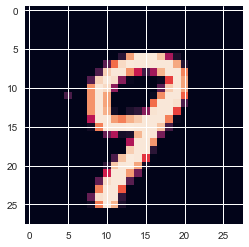

In [27]:
plt.imshow(sample)

## Network Settings

In [23]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [24]:
n_classes = 10
n_samples = mnist.train.num_examples

In [25]:
n_input = 784

In [26]:
n_hidden_1 = 256
n_hidden_2 = 256

In [40]:
def multilayer_perceptron(x,weights,biases):
    
    #1st layer
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    #2nd layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [41]:
weights = {
    
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [42]:
biases = {
    
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [43]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])

In [44]:
pred = multilayer_perceptron(x,weights,biases)

In [47]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Run the Session

In [48]:
sess = tf.InteractiveSession()

In [50]:
init = tf.global_variables_initializer()

In [51]:
sess.run(init)

### training the model

In [54]:
for epoch in range(training_epochs):
    
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
    print("Epoch: {}, Cost: {:.4f}".format(epoch+1,avg_cost))
    

Epoch: 1, Cost: 0.4900
Epoch: 2, Cost: 0.4748
Epoch: 3, Cost: 0.4314
Epoch: 4, Cost: 0.3441
Epoch: 5, Cost: 0.3509
Epoch: 6, Cost: 0.3486
Epoch: 7, Cost: 0.3526
Epoch: 8, Cost: 0.2365
Epoch: 9, Cost: 0.3874
Epoch: 10, Cost: 0.2691
Epoch: 11, Cost: 0.2350
Epoch: 12, Cost: 0.3059
Epoch: 13, Cost: 0.2661
Epoch: 14, Cost: 0.2193
Epoch: 15, Cost: 0.1936


## Model Evaluation

In [55]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [57]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [58]:
correct_predictions = tf.cast(correct_predictions,'float')

In [60]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=float32)


In [61]:
accuracy = tf.reduce_mean(correct_predictions)

In [62]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [63]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9598